Cosine similarity BERT sentence Transformers 

https://www.sbert.net/docs/pretrained_models.html
all-mpnet-base-v2 is chosen based on performance ssentence embeddings

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-mpnet-base-v2')

/Users/mstudio/miniforge3/envs/hemingway/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
data=pd.read_csv('/Volumes/T7/mt-hemingway/data/book_final.csv')
cosine_df=pd.read_csv('/Volumes/T7/mt-hemingway/data/cosine_df.csv')

In [5]:
english_columns=['original', 'OPUS_small', 'OPUS_big', 'M2M100_small', 'M2M100_big', 'kakao_small', 'kakao_big', 'google_small', 'goggle_big']

In [6]:
korean_columns=['small', 'big', 'kakao_org', 'M2M100_org', 'google_org']

In [7]:
print(len(english_columns), len(korean_columns))

9 5


In [7]:
data.head(1)

,original,small,big,OPUS_small,OPUS_big,kakao_org,M2M100_org,M2M100_small,M2M100_big,kakao_small,kakao_big,google_org,google_small,google_big
0,He was an old man who fished alone in a skiff ...,산티아고는 멕시코 만류에서 조각배를 타고 혼자 고기잡이를 하는 늙은 어부였다. 오늘...,그는 멕시코 해류에서 조각배를 타고 홀로 고기잡이하는 노인이었다. 여든 날하고도 나...,Santiago was an old fisherman riding alone in...,He was an old man riding on a rock boat in th...,"그는 멕시코 만류에서 보트를 타고 혼자 낚시를 하던 노인이었는데, 지금은 84일째 ...","그는 골프 스트림에서 스키프에서 혼자 낚시 한 늙은이였고, 지금은 물고기를 먹지 않...",Santiago was an old fisherman on a sculptural ...,He was an elderly man on a sculptural boat in ...,Santiago was an old fisherman who fished alone...,He was an old man fishing alone in a carving b...,"그는 걸프 스트림의 스키프에서 혼자 낚시를 한 노인이었고, 물고기를 먹지 않고 82...",Santiago was an old fisherman who was fishing ...,He was an elderly man who was fishing alone on...


In [8]:
def get_similarity_score(df:pd.DataFrame, compare1:str, compare2:str):
    cosines=[]
    for idx, val in tqdm(df.iterrows()):
        embeddings1=model.encode(val[compare1], convert_to_tensor=True)
        embeddings2=model.encode(val[compare2], convert_to_tensor=True)
        cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)
        cosines.append(cosine_scores[0][0].item())
    return cosines   
        

In [9]:
original_OPUS_small=get_similarity_score(data, 'original', 'OPUS_small')
original_OPUS_big=get_similarity_score(data, 'original', 'OPUS_big')
original_M2M100_small=get_similarity_score(data, 'original', 'M2M100_small')
original_M2M100_big=get_similarity_score(data, 'original', 'M2M100_big')
original_kakao_small=get_similarity_score(data, 'original', 'kakao_small')
original_kakao_big=get_similarity_score(data, 'original', 'kakao_big')
original_google_small=get_similarity_score(data, 'original', 'google_small')
original_google_big=get_similarity_score(data, 'original', 'google_big')

768it [04:48,  2.66it/s]
768it [04:59,  2.56it/s]
768it [05:29,  2.33it/s]
768it [05:33,  2.30it/s]
768it [05:30,  2.33it/s]
768it [05:20,  2.40it/s]
768it [05:29,  2.33it/s]
768it [05:45,  2.23it/s]


In [10]:
cosine_df=pd.DataFrame({'OPUS_small':original_OPUS_small, 'OPUS_big':original_OPUS_big, 'M2M100_small':original_M2M100_small, 'M2M100_big':original_M2M100_big, 'kakao_small':original_kakao_small, 'kakao_big':original_kakao_big, 'google_small':original_google_small, 'google_big':original_google_big})

In [11]:
cosine_df.to_csv('data/cosine_df.csv', index=False)

In [12]:
pos_opus_small=cosine_df['OPUS_small'].copy()

In [14]:
pos_opus_small[pos_opus_small<=0.5]

76     0.238175
78     0.435598
118    0.488201
126    0.474539
156    0.398615
         ...   
756    0.336752
757    0.410122
759    0.482045
764    0.466686
766    0.464154
Name: OPUS_small, Length: 114, dtype: float64

In [38]:
pos_opus_small=cosine_df['OPUS_small'].copy()
neg_opus_small=cosine_df['OPUS_small'].copy()
pos_opus_small[pos_opus_small<=0.5]=np.nan
neg_opus_small[neg_opus_small>0.5]=np.nan
pos_opus_big=cosine_df['OPUS_big'].copy()
neg_opus_big=cosine_df['OPUS_big'].copy()
pos_opus_big[pos_opus_big<=0.5]=np.nan
neg_opus_big[neg_opus_big>0.5]=np.nan
pos_m2m100_small=cosine_df['M2M100_small'].copy()
neg_m2m100_small=cosine_df['M2M100_small'].copy()
pos_m2m100_small[pos_m2m100_small<=0.5]=np.nan
neg_m2m100_small[neg_m2m100_small>0.5]=np.nan
pos_m2m100_big=cosine_df['M2M100_big'].copy()
neg_m2m100_big=cosine_df['M2M100_big'].copy()
pos_m2m100_big[pos_m2m100_big<=0.5]=np.nan
neg_m2m100_big[neg_m2m100_big>0.5]=np.nan
pos_kakao_small=cosine_df['kakao_small'].copy()
neg_kakao_small=cosine_df['kakao_small'].copy()
pos_kakao_small[pos_kakao_small<=0.5]=np.nan
neg_kakao_small[neg_kakao_small>0.5]=np.nan
pos_kakao_big=cosine_df['kakao_big'].copy()
neg_kakao_big=cosine_df['kakao_big'].copy()
pos_kakao_big[pos_kakao_big<=0.5]=np.nan
neg_kakao_big[neg_kakao_big>0.5]=np.nan
pos_google_small=cosine_df['google_small'].copy()
neg_google_small=cosine_df['google_small'].copy()
pos_google_small[pos_google_small<=0.5]=np.nan
neg_google_small[neg_google_small>0.5]=np.nan
pos_google_big=cosine_df['google_big'].copy()
neg_google_big=cosine_df['google_big'].copy()
pos_google_big[pos_google_big<=0.5]=np.nan
neg_google_big[neg_google_big>0.5]=np.nan

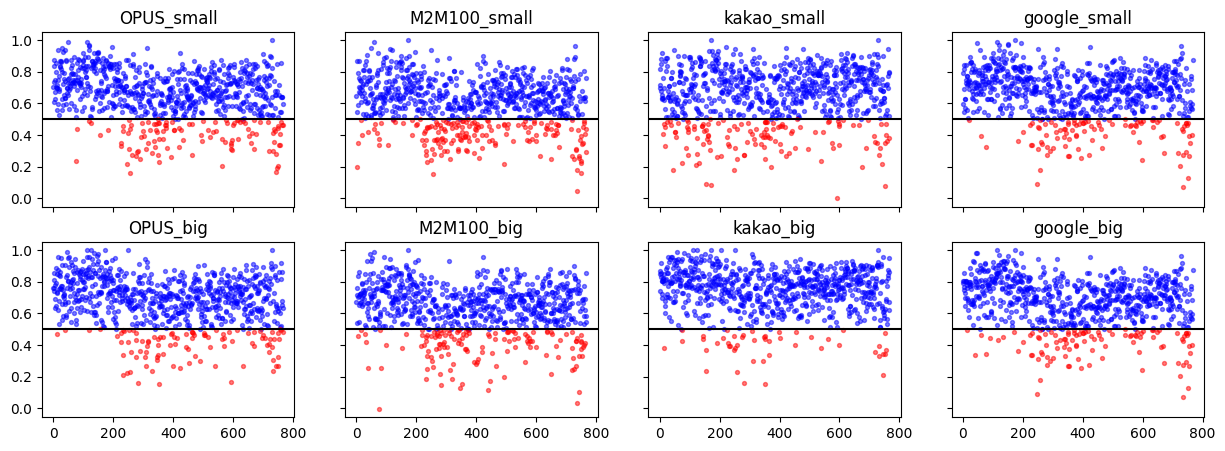

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5), sharex=True, sharey=True)
axes[0,0].scatter(x=range(len(pos_opus_small)), y=pos_opus_small, color='blue', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].scatter(x=range(len(neg_opus_small)), y=neg_opus_small, color='red', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].axhline(y=0.5, color='black', linestyle='-')
axes[0,0].set_title('OPUS_small')
axes[1,0].scatter(x=range(len(pos_opus_big)), y=pos_opus_big, color='blue', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].scatter(x=range(len(neg_opus_big)), y=neg_opus_big, color='red', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].axhline(y=0.5, color='black', linestyle='-')
axes[1,0].set_title('OPUS_big')
axes[0,1].scatter(x=range(len(pos_m2m100_small)), y=pos_m2m100_small, color='blue', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].scatter(x=range(len(neg_m2m100_small)), y=neg_m2m100_small, color='red', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].axhline(y=0.5, color='black', linestyle='-')
axes[0,1].set_title('M2M100_small')
axes[1,1].scatter(x=range(len(pos_m2m100_big)), y=pos_m2m100_big, color='blue', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].scatter(x=range(len(neg_m2m100_big)), y=neg_m2m100_big, color='red', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].axhline(y=0.5, color='black', linestyle='-')
axes[1,1].set_title('M2M100_big')
axes[0,2].scatter(x=range(len(pos_kakao_small)), y=pos_kakao_small, color='blue', label='kakao_small', alpha=0.5, s=8)
axes[0,2].scatter(x=range(len(neg_kakao_small)), y=neg_kakao_small, color='red', label='kakao_small', alpha=0.5, s=8)
axes[0,2].axhline(y=0.5, color='black', linestyle='-')
axes[0,2].set_title('kakao_small')
axes[1,2].scatter(x=range(len(pos_kakao_big)), y=pos_kakao_big, color='blue', label='kakao_big', alpha=0.5, s=8)
axes[1,2].scatter(x=range(len(neg_kakao_big)), y=neg_kakao_big, color='red', label='kakao_big', alpha=0.5, s=8)
axes[1,2].axhline(y=0.5, color='black', linestyle='-')
axes[1,2].set_title('kakao_big')
axes[0,3].scatter(x=range(len(pos_google_small)), y=pos_google_small, color='blue', label='google_small', alpha=0.5, s=8)
axes[0,3].scatter(x=range(len(neg_google_small)), y=neg_google_small, color='red', label='google_small', alpha=0.5, s=8)
axes[0,3].axhline(y=0.5, color='black', linestyle='-')
axes[0,3].set_title('google_small')
axes[1,3].scatter(x=range(len(pos_google_big)), y=pos_google_big, color='blue', label='google_big', alpha=0.5, s=8)
axes[1,3].scatter(x=range(len(neg_google_big)), y=neg_google_big, color='red', label='google_big', alpha=0.5, s=8)
axes[1,3].axhline(y=0.5, color='black', linestyle='-')
axes[1,3].set_title('google_big')
plt.show()
